## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

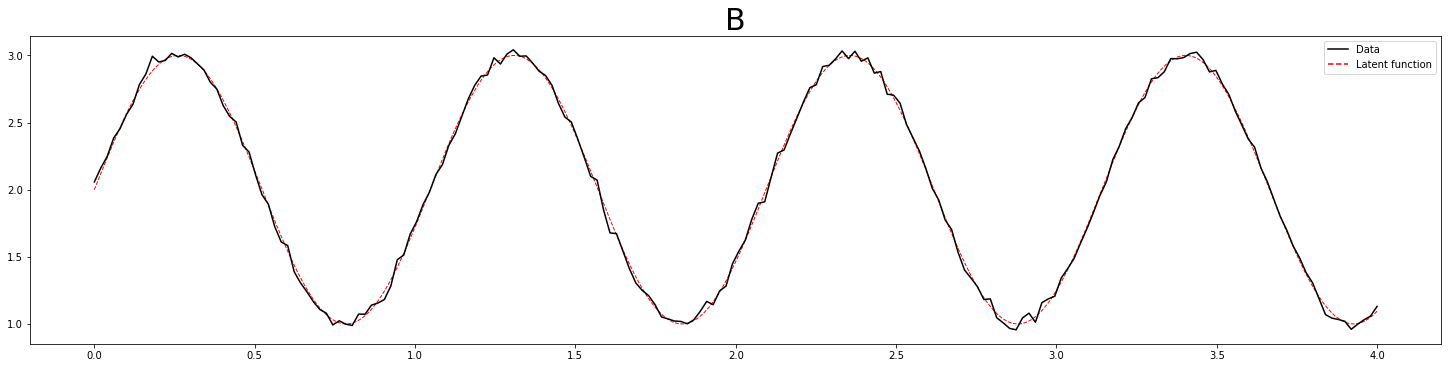

In [2]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)
data.plot()

In [3]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0.5062309077535645,
  'mixture_means': array([2.1962145]),
  'mixture_scales': array([0.7828285])},
 {'mixture_weights': 1.455634700604022,
  'mixture_means': array([0.32686864]),
  'mixture_scales': array([1.90340155])},
 {'mixture_weights': 0.24683127775904395,
  'mixture_means': array([0.918248]),
  'mixture_scales': array([0.06762675])}]

In [4]:
sm.init_params()
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

[{'mixture_weights': 1.2543251290926727,
  'mixture_means': array([0.92055911]),
  'mixture_scales': array([0.20418619])},
 {'mixture_weights': 0.9040468523709937,
  'mixture_means': array([0.50257552]),
  'mixture_scales': array([0.55310325])},
 {'mixture_weights': 0.8416280185363332,
  'mixture_means': array([0.63692739]),
  'mixture_scales': array([0.546387])}]

In [5]:
sm.train(method='BFGS')
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
         Current function value: -397.304818
         Iterations: 38
         Function evaluations: 80
         Gradient evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -397.304818
  Number of iterations: 38
  Number of functions evaluations: 80
Done in  0.026446982224782308  minutes


[{'mixture_weights': 0.5047947155305136,
  'mixture_means': array([0.95391624]),
  'mixture_scales': array([1.05706954e-06])},
 {'mixture_weights': 4.002025619494641,
  'mixture_means': array([1.00007183e-06]),
  'mixture_scales': array([1.00004507e-06])},
 {'mixture_weights': 1.000000074162898e-06,
  'mixture_means': array([1.02080862e-05]),
  'mixture_scales': array([2.32364501e-05])}]

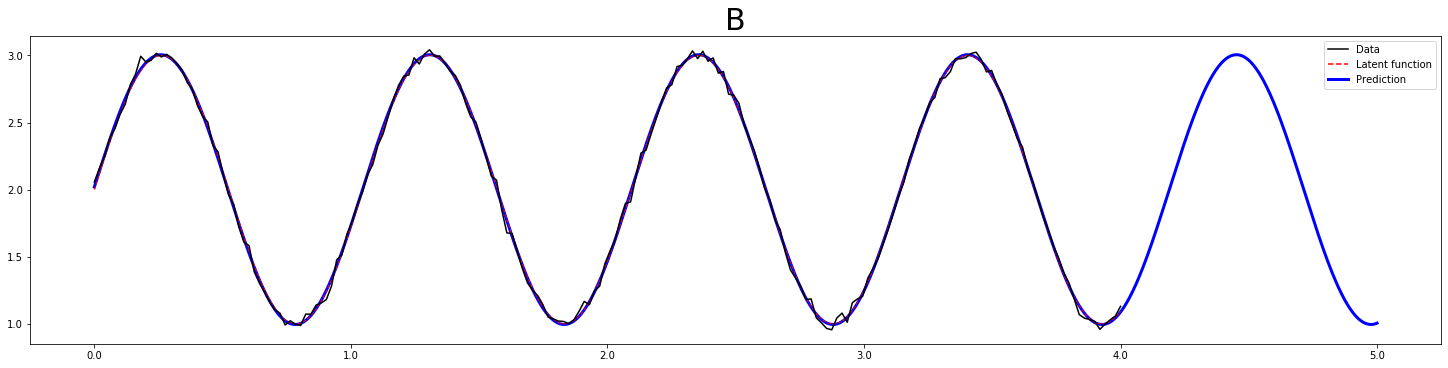

In [6]:
sm.data[0].set_pred_range(0.0, 5.0, 2000)
sm.predict()
sm.data[0].plot()

In [7]:
sm.save('sm')

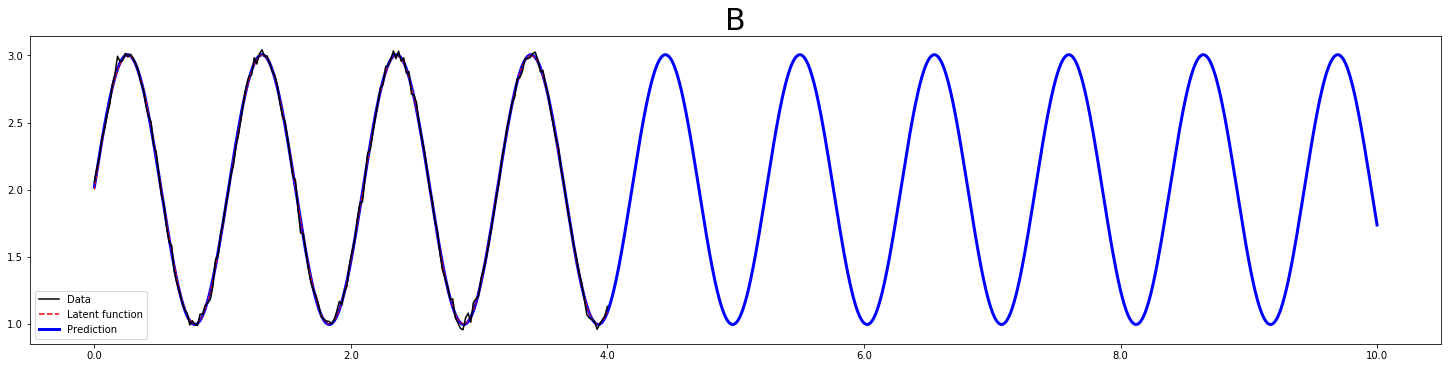

In [16]:
sm2 = mogptk.LoadModel('sm')
sm2.data[0].set_pred_range(0.0, 10.0, n=2000)
sm2.predict()
sm2.data[0].plot()

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

In [ ]:
mosm.init_params(plot=True)
display(mosm.get_params())

In [ ]:
mosm.train()
display(mosm.get_params())

In [ ]:
mosm.set_prediction_range(0, 0.0, 5.0, n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.init_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.set_prediction_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [ ]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

In [ ]:
cg.init_params()
display(cg.get_params())

In [ ]:
cg.train(method='Adam')
display(cg.get_params())

In [ ]:
cg.set_prediction_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot(cg)